In [1]:
import numpy as np

import matplotlib

import qiskit

import qiskit.circuit.library

from qiskit.quantum_info.operators import Operator

from qiskit import *

from qiskit.visualization import plot_histogram

from qiskit.visualization import plot_state_city

### Parameters

In [56]:
bias = 1 #secret bias bit
s = [1,0,0] # secret string
nqubits = len(s) # N_max = 2^nqubits

### Oracle
#### Implementing $f_{s}(x) = x_{0} \cdot s_{0} \bigoplus_{2} x_{1} \cdot s_{1} \bigoplus_{2} \dots \bigoplus_{2} x_{n} \cdot s_{n} \bigoplus_{2} bias$ 

In [57]:
def make_oracle(s, bias, nqubits):
    sub_oracle = QuantumCircuit(nqubits+1, name = 'Oracle')

    if bias:
        sub_oracle.x(nqubits)
    
    for qubit, bit in zip(range(nqubits),s):
        if bit:
            sub_oracle.cx(qubit, nqubits)
    
    return sub_oracle

### Quantum circuit

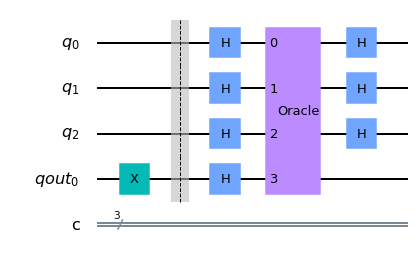

In [60]:
#INITIALIZATION

qr = QuantumRegister(nqubits, 'q')
qout = QuantumRegister(1, 'qout')
cr = ClassicalRegister(nqubits, 'c')

BV_circuit = QuantumCircuit(qr, qout, cr)

# Hadamard gates
def hadamards(qc, qubits):
    for q in range(qubits):
        qc.h(q)



BV_circuit.x(nqubits)
BV_circuit.barrier()
hadamards(BV_circuit, nqubits)
BV_circuit.h(nqubits)

#ORACLE

BV_circuit.append(make_oracle(s, bias, nqubits).to_instruction(), range(nqubits+1))

hadamards(BV_circuit, nqubits)

BV_circuit.draw('mpl')

### Simulation (statevector_simulator)

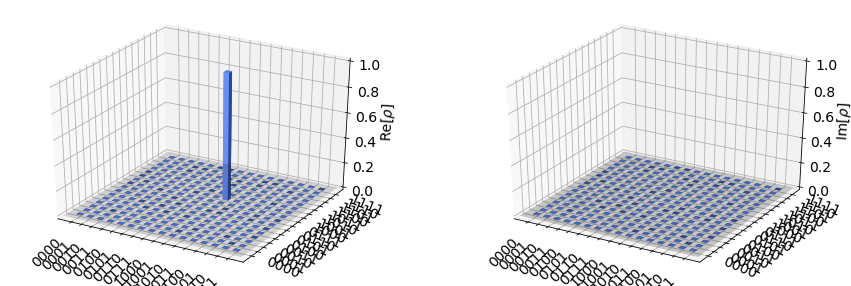

In [29]:
simulator1 = Aer.get_backend('statevector_simulator')

job = execute(BV_circuit, simulator1)

plot_state_city(job.result().get_statevector(BV_circuit))

### Measure

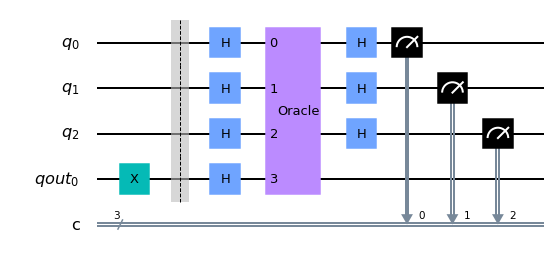

In [61]:
BV_circuit.measure(range(nqubits), range(nqubits))
BV_circuit.draw('mpl')

### Simulation (qasm_simulator)

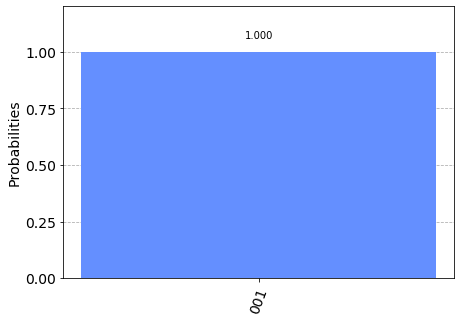

In [62]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(BV_circuit, simulator, shots=1000)

plot_histogram(job.result().get_counts(BV_circuit))